# Principal Component Analysis with Cancer Data

In [2]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [4]:
cancerdf = pd.read_csv('breast-cancer-wisconsin-data.csv')
cancerdf.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [0]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [5]:
cancerdf.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [6]:
cancerdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [70]:
# shape
cancerdf.shape

(699, 11)

In [24]:
cancerdf.describe()
# ignore ID for below

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [71]:
# value counts for multi class
cancerdf['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [7]:
# We could see "?" values in column, this should be removed from data set
cancerdf['Bare Nuclei'].value_counts()
# can see 16 instances of question mark

# Check for missing value in any other column

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [8]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
cancerdf[cancerdf['Bare Nuclei']=='?'].count()

# as stated there are 16 missing values

ID                             16
ClumpThickness                 16
Cell Size                      16
Cell Shape                     16
Marginal Adhesion              16
Single Epithelial Cell Size    16
Bare Nuclei                    16
Normal Nucleoli                16
Bland Chromatin                16
Mitoses                        16
Class                          16
dtype: int64

In [9]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values
m = cancerdf['Bare Nuclei'].mode()[0]

cancerdf['Bare Nuclei'] = cancerdf['Bare Nuclei'].replace('?',m)

In [10]:
cancerdf = cancerdf.astype({'Bare Nuclei': 'int'})

In [11]:
cancerdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(11)
memory usage: 60.1 KB


In [12]:
cancerdf.drop_duplicates(inplace=True)
cancerdf.count()
# 9 dups removed

ID                             690
ClumpThickness                 690
Cell Size                      690
Cell Shape                     690
Marginal Adhesion              690
Single Epithelial Cell Size    690
Bare Nuclei                    690
Normal Nucleoli                690
Bland Chromatin                690
Mitoses                        690
Class                          690
dtype: int64

In [13]:
# remove ID
cancerdf.drop(['ID'],inplace=True, axis=1)

In [14]:
cancerdf.head(4)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [15]:
# Check for correlation of variable
cancerdf.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.643173,0.653589,0.487715,0.517253,0.590648,0.561063,0.535507,0.350196,0.716812
Cell Size,0.643173,1.000000,0.905349,0.712933,0.746982,0.684571,0.759632,0.727073,0.459918,0.817586
Cell Shape,0.653589,0.905349,1.000000,0.690782,0.714243,0.704165,0.738576,0.724519,0.440435,0.817551
Marginal Adhesion,0.487715,0.712933,0.690782,1.000000,0.608281,0.672512,0.669860,0.602228,0.417008,0.701175
Single Epithelial Cell Size,0.517253,0.746982,0.714243,0.608281,1.000000,0.580487,0.620526,0.633880,0.482517,0.681063
Bare Nuclei,0.590648,0.684571,0.704165,0.672512,0.580487,1.000000,0.672754,0.578161,0.342823,0.816655
Normal Nucleoli,0.561063,0.759632,0.738576,0.669860,0.620526,0.672754,1.000000,0.669099,0.343769,0.756736
Bland Chromatin,0.535507,0.727073,0.724519,0.602228,0.633880,0.578161,0.669099,1.000000,0.427490,0.715363
Mitoses,0.350196,0.459918,0.440435,0.417008,0.482517,0.342823,0.343769,0.427490,1.000000,0.423947
Class,0.716812,0.817586,0.817551,0.701175,0.681063,0.816655,0.756736,0.715363,0.423947,1.000000


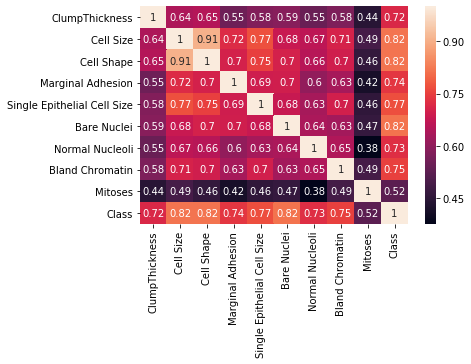

In [42]:
sns.heatmap(cancerdf.corr(), annot=True)

In [0]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

/Volumes/Activeai-drive/anaconda/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Volumes/Activeai-drive/anaconda/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<Figure size 720x720 with 0 Axes>

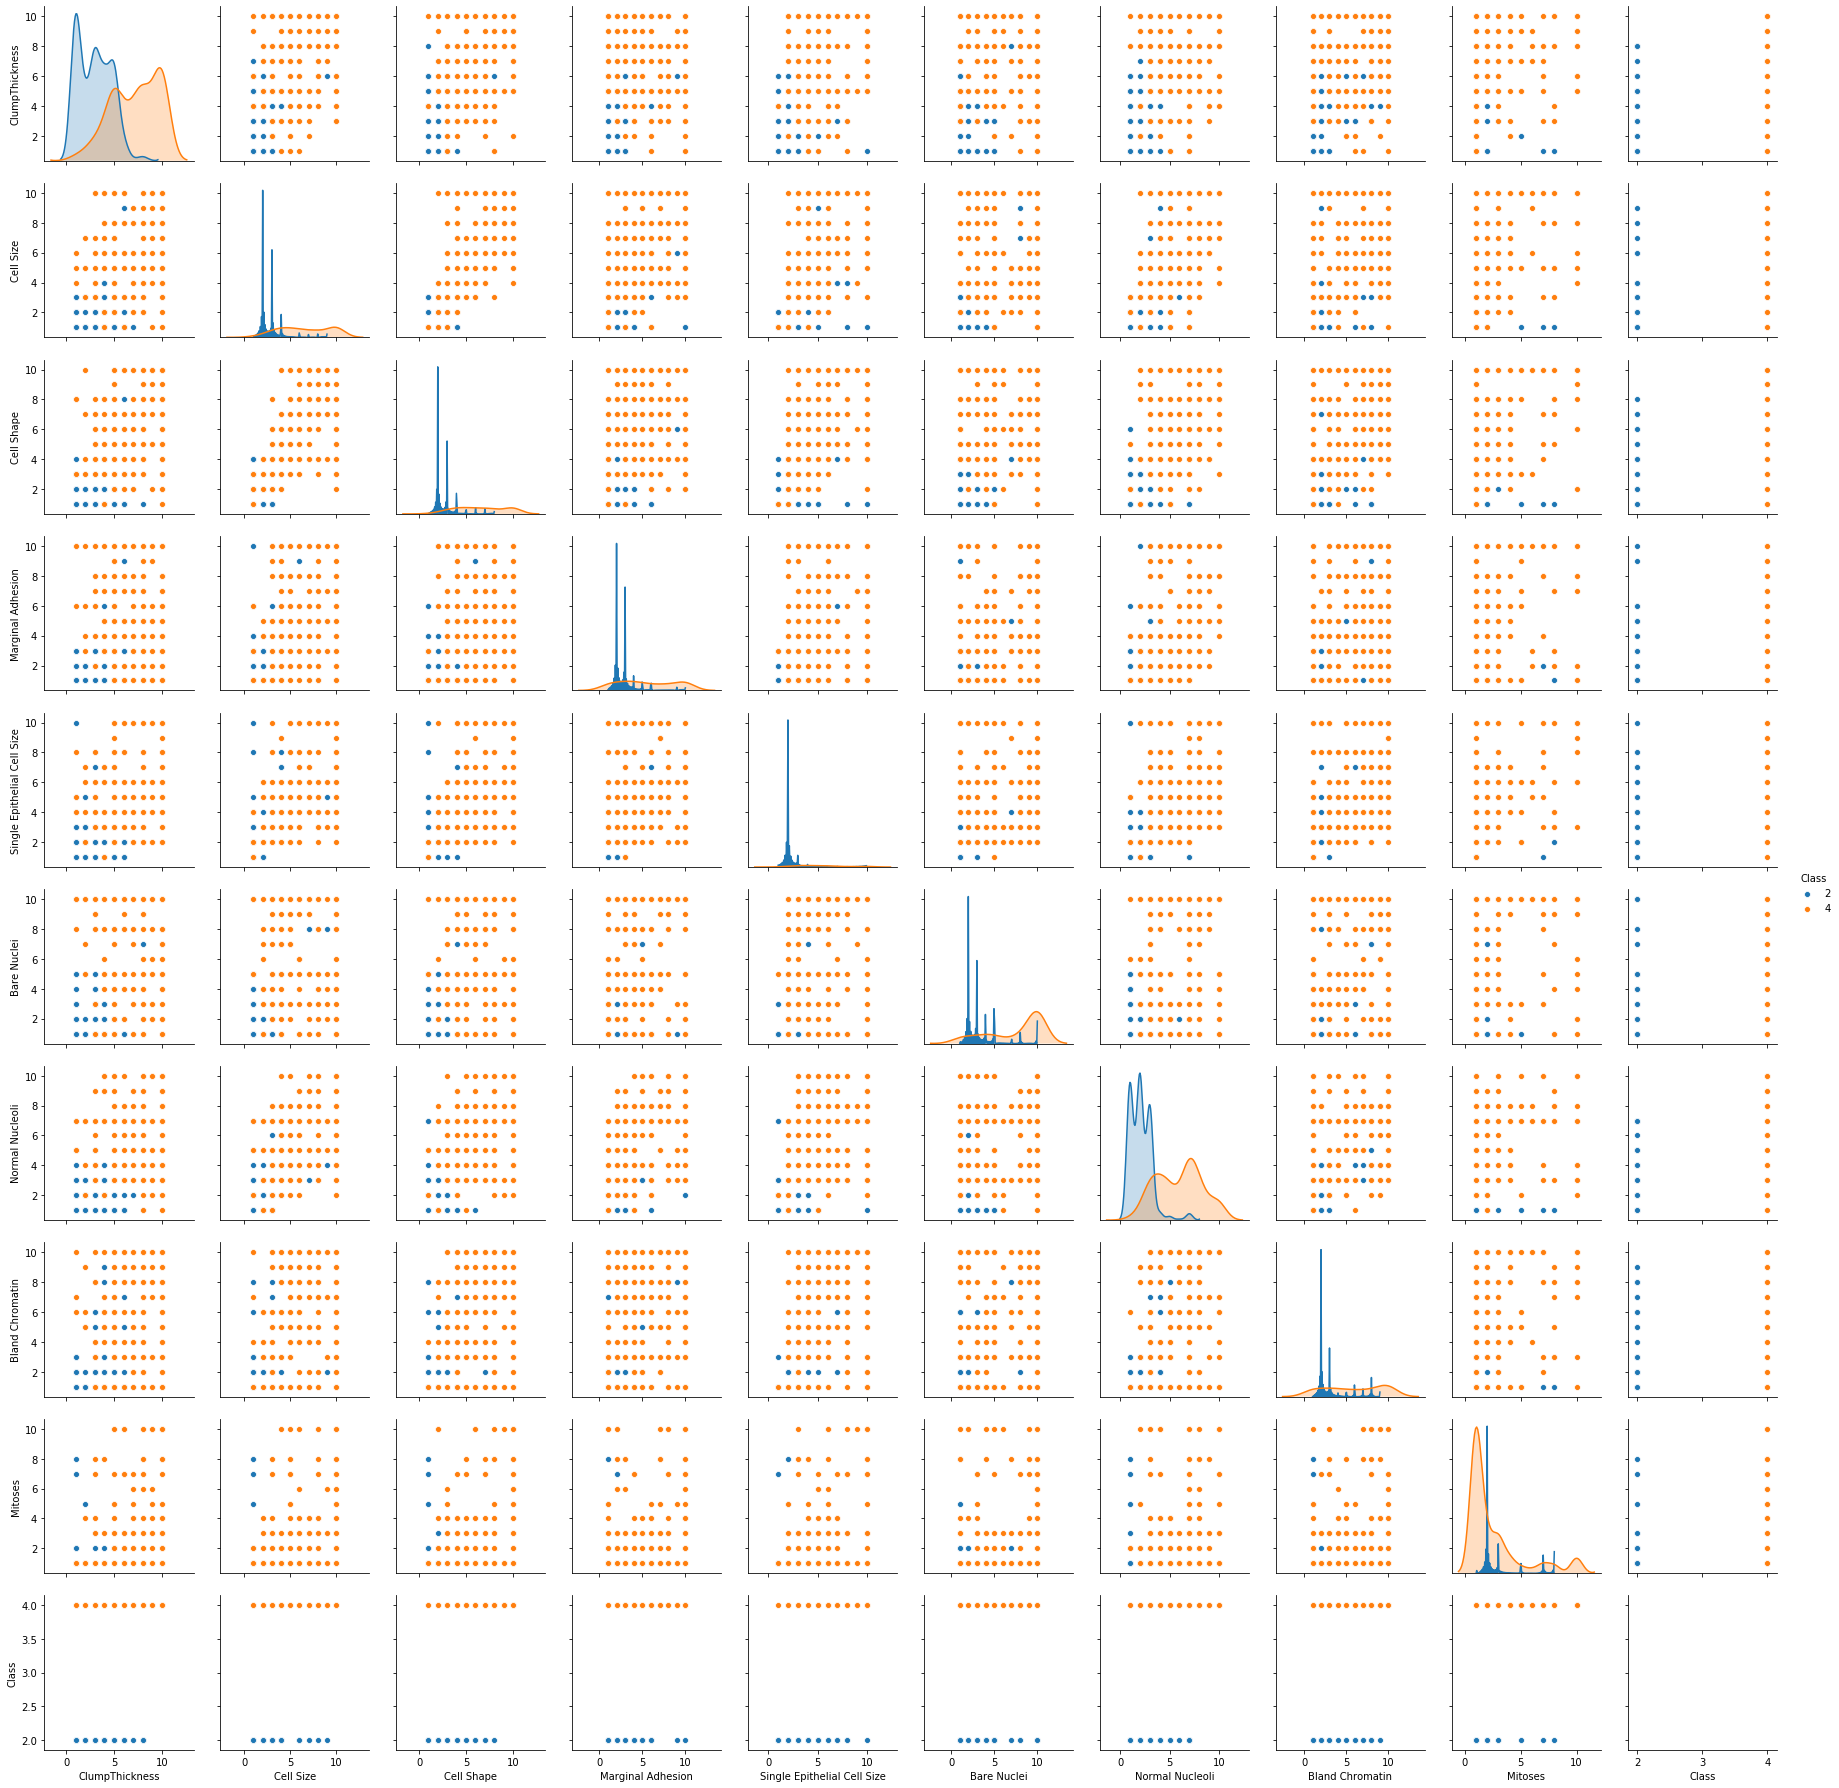

In [23]:
#Let us check for pair plots
plt.figure(figsize=(10, 10))
sns.pairplot(cancerdf, hue='Class')
plt.show()

In [0]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

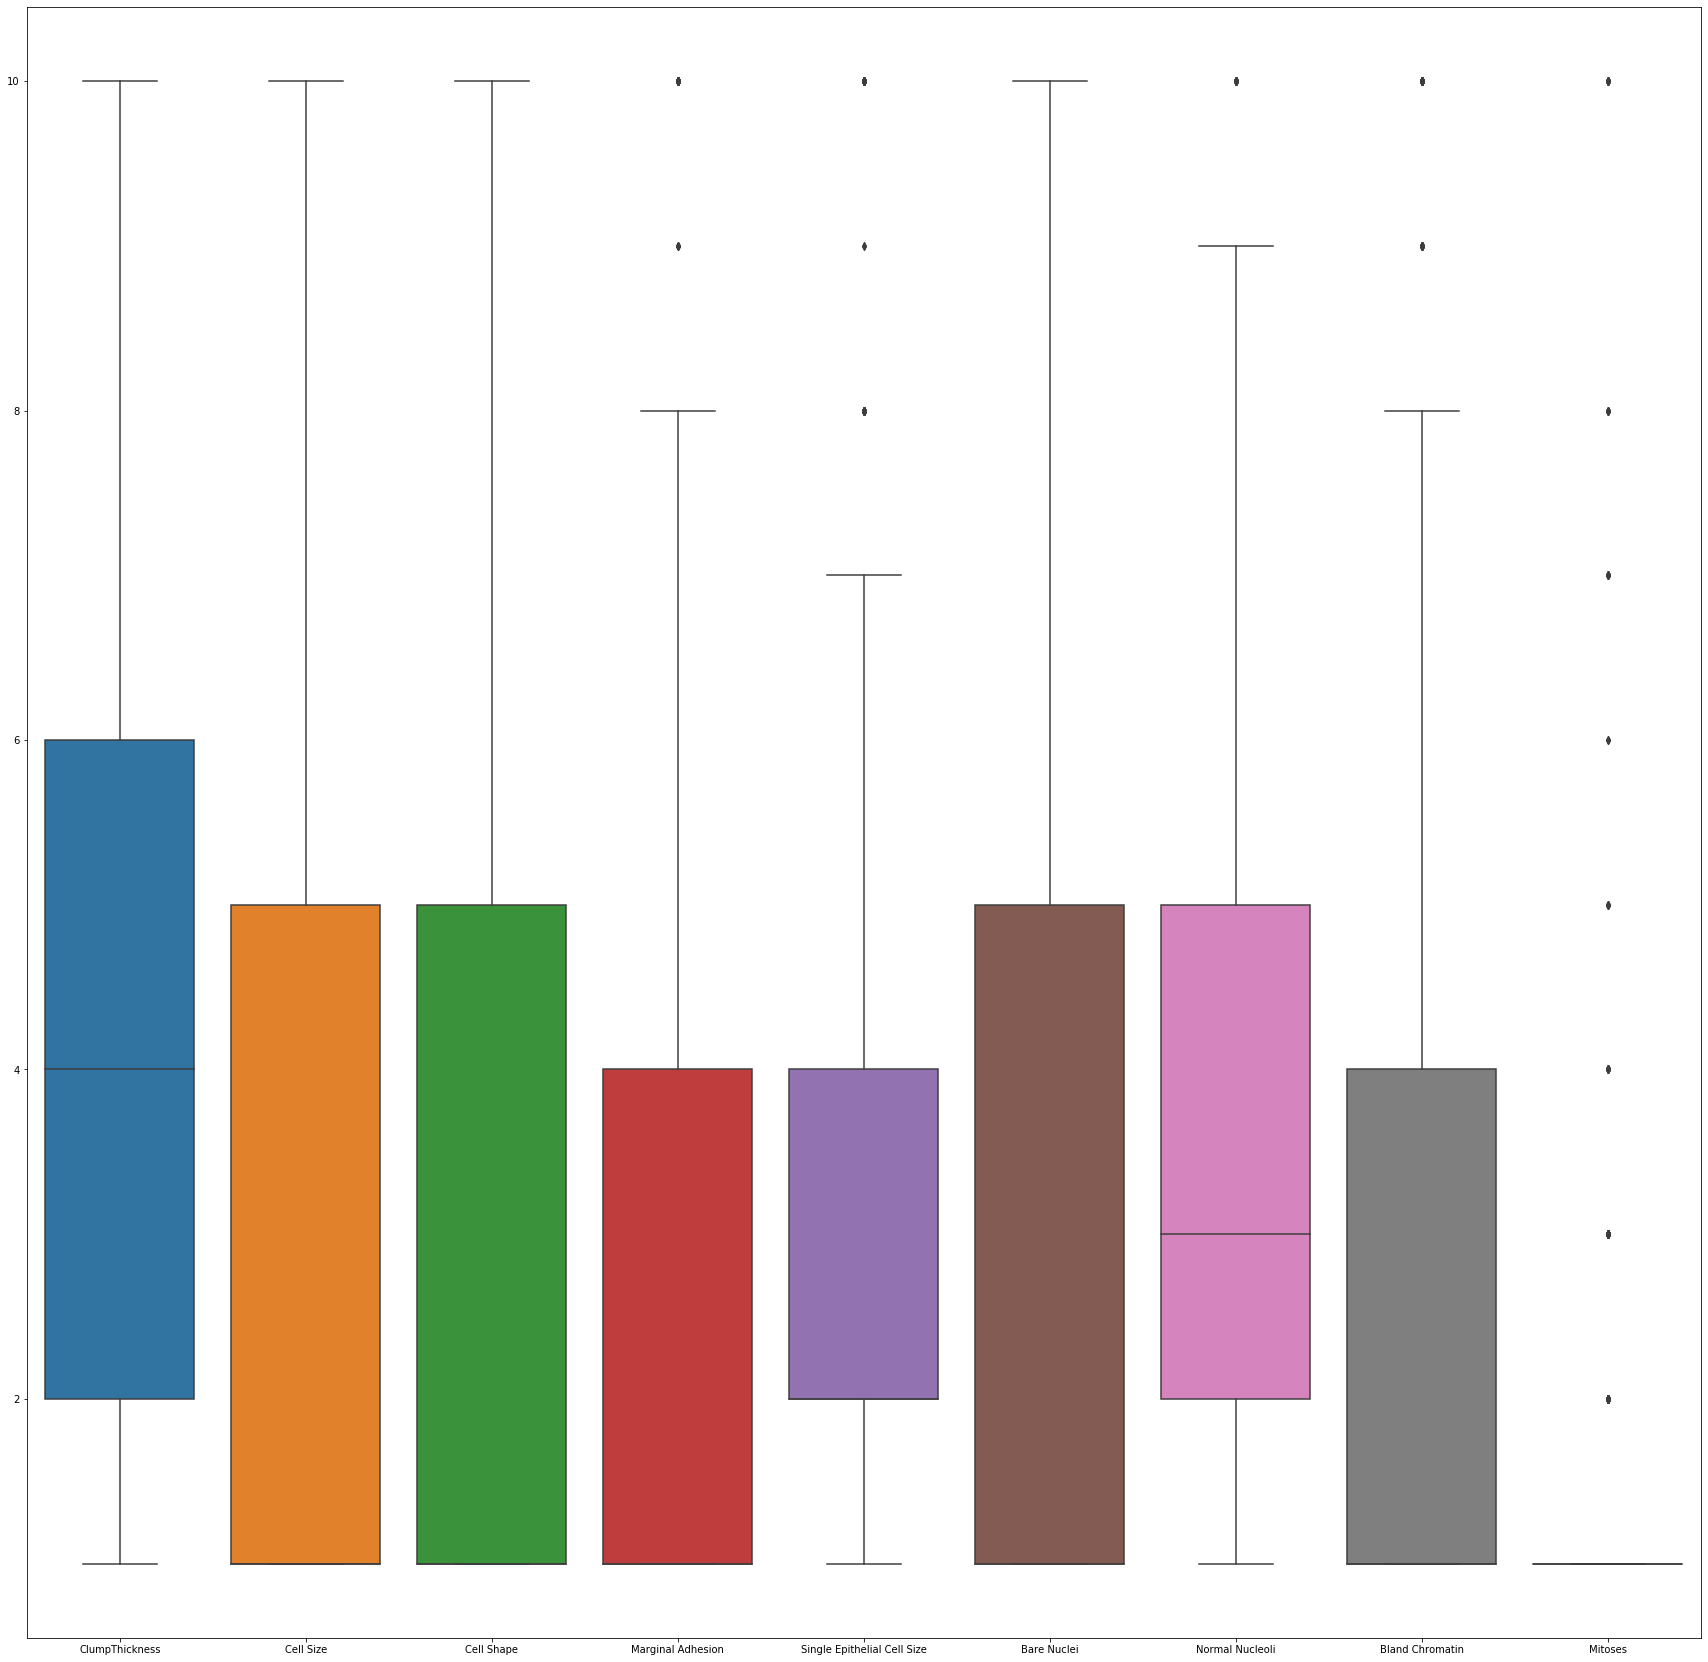

In [25]:
# boxplot
plt.figure(figsize=(30, 30))
sns.boxplot(data=cancerdf.drop('Class',axis=1))
plt.show()

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [0]:
# We could see most of the outliers are now removed.

In [29]:
pd.crosstab(cancerdf['Marginal Adhesion'],cancerdf['Class'])

Class,2,4
Marginal Adhesion,,
1,369,31
2,37,19
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [30]:
cancerdf['Marginal Adhesion'] = np.where(cancerdf['Marginal Adhesion']>4,4,cancerdf['Marginal Adhesion'])

In [31]:
pd.crosstab(cancerdf['Single Epithelial Cell Size'],cancerdf['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,44,1
2,359,23
3,29,42
4,7,41
5,5,34
6,2,39
7,3,9
8,2,18
9,0,2


In [32]:
cancerdf['Single Epithelial Cell Size'] = np.where(cancerdf['Single Epithelial Cell Size']>4,4,cancerdf['Single Epithelial Cell Size'])


In [34]:
pd.crosstab(cancerdf['Normal Nucleoli'],cancerdf['Class'])

Class,2,4
Normal Nucleoli,,
1,149,2
2,158,7
3,125,35
4,8,32
5,4,30
6,1,9
7,7,64
8,0,28
9,0,11


In [35]:
cancerdf['Normal Nucleoli'] = np.where(cancerdf['Normal Nucleoli']>4,4,cancerdf['Normal Nucleoli'])

In [36]:
pd.crosstab(cancerdf['Bland Chromatin'],cancerdf['Class'])

Class,2,4
Bland Chromatin,,
1,396,40
2,30,6
3,12,30
4,1,17
5,2,17
6,4,18
7,2,14
8,4,20
9,1,15


In [37]:
cancerdf['Bland Chromatin'] = np.where(cancerdf['Bland Chromatin']>3,3,cancerdf['Bland Chromatin'])

In [40]:
pd.crosstab(cancerdf['Mitoses'],cancerdf['Class'])

Class,2,4
Mitoses,,
1,439,132
2,13,106


In [39]:
cancerdf['Mitoses'] = np.where(cancerdf['Mitoses']>2,2,cancerdf['Mitoses'])

# Q6 Create a covariance matrix for identifying Principal components

In [43]:
# PCA
# Step 1 - Create covariance matrix
cov = cancerdf.drop('Class',axis=1).cov()
cov

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
ClumpThickness,7.937620,5.513111,5.452123,2.021350,1.583623,6.019082,1.748234,1.494222,0.471627
Cell Size,5.513111,9.256507,8.155588,2.848573,2.264635,7.533527,2.311659,1.979777,0.566231
Cell Shape,5.452123,8.155588,8.766599,2.703856,2.139648,7.541295,2.214369,1.900650,0.519133
Marginal Adhesion,2.021350,2.848573,2.703856,1.686292,0.869460,3.268757,0.890663,0.759302,0.205044
Single Epithelial Cell Size,1.583623,2.264635,2.139648,0.869460,0.929429,2.377548,0.695694,0.621968,0.165878
Bare Nuclei,6.019082,7.533527,7.541295,3.268757,2.377548,13.083151,2.637300,2.098997,0.636531
Normal Nucleoli,1.748234,2.311659,2.214369,0.890663,0.695694,2.637300,1.292066,0.679342,0.162022
Bland Chromatin,1.494222,1.979777,1.900650,0.759302,0.621968,2.098997,0.679342,0.849238,0.170678
Mitoses,0.471627,0.566231,0.519133,0.205044,0.165878,0.636531,0.162022,0.170678,0.142927


# Q7 Identify eigen values and eigen vector

In [50]:
# Step 2- Get eigen values and eigen vector
from numpy import linalg as LA
# eigenvalues, eigenvectors -- w, v
w, v = LA.eig(cov)
print('Eigen Values --', w)
print('Eigen Vectors --', v)

Eigen Values -- [33.11641619  4.38624456  3.55242005  0.89910593  0.69655441  0.58304033
  0.09691484  0.35843163  0.25470159]
Eigen Vectors -- [[-0.38205729  0.31335123 -0.86705964  0.00939872  0.04803443  0.02565242
  -0.01884413  0.02384719  0.00856372]
 [-0.48452153  0.37221663  0.37031595 -0.50003597  0.47651161 -0.03780815
  -0.03024701  0.08447825 -0.05458543]
 [-0.47453705  0.31727245  0.3205252   0.7207843  -0.22337652  0.03413118
   0.01607549  0.02374155  0.00151125]
 [-0.17795834 -0.02824813  0.05900676 -0.34498748 -0.56145202  0.68647415
   0.00726431  0.22834858 -0.07977306]
 [-0.1358288   0.02040584  0.04973951 -0.15881901 -0.17370144  0.00861558
  -0.0098655  -0.52849896  0.80236011]
 [-0.55382377 -0.8128338  -0.04002757  0.06196516  0.16189508 -0.01512164
  -0.01786409  0.01003914 -0.01673231]
 [-0.14581813 -0.00865255  0.01882581 -0.24249899 -0.52310124 -0.70666216
   0.03545357  0.37496322  0.06812742]
 [-0.12146026  0.02477466  0.01838217 -0.14898633 -0.27465403 -0.

# Q8 Find variance and cumulative variance by each eigen vector

In [53]:
# total value of eV

# variance on each PCA (eV) var = v/sum(v)
# cum variance on each PCA sum(var)
# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(w[index], v[:,index]) for index in range(len(w))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
w_sorted = [eig_pairs[index][0] for index in range(len(w))]
v_sorted = [eig_pairs[index][1] for index in range(len(w))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigen values in descending order: \n%s' %w_sorted)

[(33.11641619091492, array([-0.38205729, -0.48452153, -0.47453705, -0.17795834, -0.1358288 ,
       -0.55382377, -0.14581813, -0.12146026, -0.03508242])), (4.386244563012367, array([ 0.31335123,  0.37221663,  0.31727245, -0.02824813,  0.02040584,
       -0.8128338 , -0.00865255,  0.02477466,  0.00147946])), (3.55242004963635, array([-0.86705964,  0.37031595,  0.3205252 ,  0.05900676,  0.04973951,
       -0.04002757,  0.01882581,  0.01838217, -0.00932402])), (0.8991059328625338, array([ 0.00939872, -0.50003597,  0.7207843 , -0.34498748, -0.15881901,
        0.06196516, -0.24249899, -0.14898633, -0.03554558])), (0.69655440939358, array([ 0.04803443,  0.47651161, -0.22337652, -0.56145202, -0.17370144,
        0.16189508, -0.52310124, -0.27465403,  0.00721077])), (0.5830403328680359, array([ 0.02565242, -0.03780815,  0.03413118,  0.68647415,  0.00861558,
       -0.01512164, -0.70666216, -0.16069168, -0.00216194])), (0.3584316309180413, array([ 0.02384719,  0.08447825,  0.02374155,  0.22834

In [56]:
tot = sum(w)
print(tot)
varexplained = [(i / tot) for i in sorted(w, reverse=True)]  
cumvarexp = np.cumsum(varexplained)  
print(cumvarexp)

43.943829536610544
[0.75360788 0.85342268 0.9342627  0.95472304 0.97057406 0.98384192
 0.9919985  0.99779457 1.        ]


# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [58]:
from sklearn.decomposition import PCA
X = cancerdf.drop('Class',axis=1)

In [61]:
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

# Q10 Find correlation between components and features

In [70]:
pcacomp = pca.components_
pd.DataFrame(pcacomp, columns=X.columns, index=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])


,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
PC1,0.382057,0.484522,0.474537,0.177958,0.135829,0.553824,0.145818,0.121460,0.035082
PC2,0.313351,0.372217,0.317272,-0.028248,0.020406,-0.812834,-0.008653,0.024775,0.001479
PC3,0.867060,-0.370316,-0.320525,-0.059007,-0.049740,0.040028,-0.018826,-0.018382,0.009324
PC4,-0.009399,0.500036,-0.720784,0.344987,0.158819,-0.061965,0.242499,0.148986,0.035546
PC5,-0.048034,-0.476512,0.223377,0.561452,0.173701,-0.161895,0.523101,0.274654,-0.007211
PC6,0.025652,-0.037808,0.034131,0.686474,0.008616,-0.015122,-0.706662,-0.160692,-0.002162
PC7,0.023847,0.084478,0.023742,0.228349,-0.528499,0.010039,0.374963,-0.712262,-0.110732
PC8,-0.008564,0.054585,-0.001511,0.079773,-0.802360,0.016732,-0.068127,0.580301,0.071616
PC9,-0.018844,-0.030247,0.016075,0.007264,-0.009866,-0.017864,0.035454,-0.129522,0.989934


In [63]:
pca.explained_variance_

array([33.11641619,  4.38624456,  3.55242005,  0.89910593,  0.69655441,
        0.58304033,  0.35843163,  0.25470159,  0.09691484])

In [64]:
pca.explained_variance_ratio_

array([0.75360788, 0.0998148 , 0.08084002, 0.02046035, 0.01585102,
       0.01326785, 0.00815659, 0.00579607, 0.00220543])

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [71]:
jokesdf = pd.read_csv('jokes.csv')
jokesdf.head(10)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,47,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,100,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,100,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,72,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [73]:
ratings=jokesdf.head(200).drop('NumJokes',axis=1)
ratings

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [74]:
ratings.replace(99.00,0,inplace=True)
ratings

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,0.00,0.00,0.00,0.00,8.59,-9.85,7.72,8.79,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,2.33,0.00,0.00,0.00,0.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,0.00,4.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [79]:
# top 10
ratings.mean().sort_values(ascending=False).head(10)

Joke50    4.05540
Joke36    3.61150
Joke53    3.57150
Joke35    3.22315
Joke29    3.18995
Joke27    3.05240
Joke62    2.86185
Joke49    2.85000
Joke32    2.77955
Joke31    2.65710
dtype: float64